In [2]:
import cv2
from matplotlib import pyplot as plt

def show_img(imgs, **kwargs):
    """Show image with Pyplot."""
    if type(imgs) is not list:
        imgs = [ imgs ]
    n = len(imgs)
    cols = 2
    rows = (n // cols) + 1
    for i in range(len(imgs)):
        plt.subplot(rows, cols, i+1)
        plt.imshow(imgs[i], **kwargs)
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [3]:
def test(arg, **kwargs):
    print(arg, not kwargs, kwargs)

test('hallo1')
test('hallo2', arg1='val1')

hallo1 True {}
hallo2 False {'arg1': 'val1'}


In [4]:
def show_flags(prefix):
    """Return a list of all cv2 constants using PREFIX."""
    return [ i for i in dir(cv2) if i.startswith(prefix)]

In [5]:
show_flags('IMREAD')

['IMREAD_ANYCOLOR',
 'IMREAD_ANYDEPTH',
 'IMREAD_COLOR',
 'IMREAD_GRAYSCALE',
 'IMREAD_IGNORE_ORIENTATION',
 'IMREAD_LOAD_GDAL',
 'IMREAD_REDUCED_COLOR_2',
 'IMREAD_REDUCED_COLOR_4',
 'IMREAD_REDUCED_COLOR_8',
 'IMREAD_REDUCED_GRAYSCALE_2',
 'IMREAD_REDUCED_GRAYSCALE_4',
 'IMREAD_REDUCED_GRAYSCALE_8',
 'IMREAD_UNCHANGED']

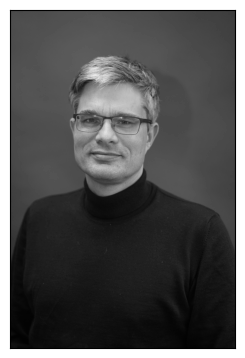

In [6]:
show_img(cv2.imread("/home/jv/Bilder/SNF02890.jpg", cv2.IMREAD_GRAYSCALE), cmap='gray')

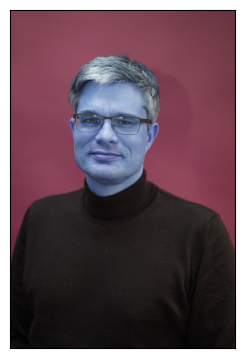

In [7]:
img= cv2.imread("/home/jv/Bilder/SNF02890.jpg")
show_img(img)

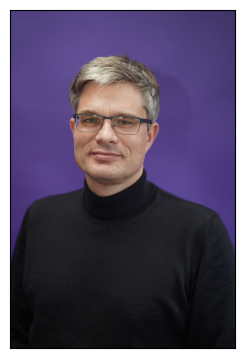

In [8]:
show_img(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

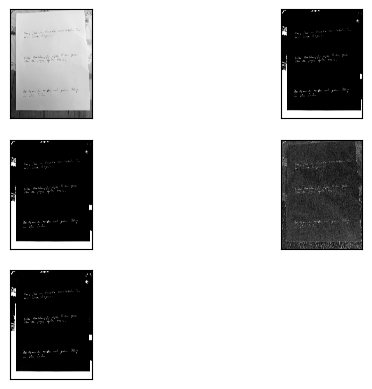

In [9]:
# Test threshold
import cv2
import numpy as np

# load image
BILD_DUNKLER_RAND="/home/jv/Bilder/010.jpeg"
BILD_BEIGE="/home/jv/Bilder/014.jpeg"
BILD_BUNTER_RAND="/home/jv/Bilder/016.jpg"

img = cv2.imread(BILD_BUNTER_RAND, cv2.IMREAD_GRAYSCALE)
img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)[1]
img_otsubinary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
img_adaptive = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
img_trianglebinary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_TRIANGLE)[1]
show_img([img, img_binary, img_otsubinary, img_adaptive, img_trianglebinary], cmap='gray')


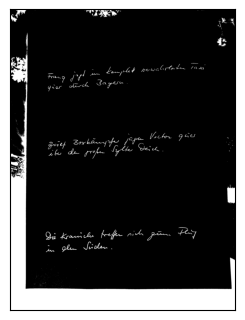

In [10]:
# load image
BILD_DUNKLER_RAND="/home/jv/Bilder/010.jpeg"
BILD_BEIGE="/home/jv/Bilder/014.jpeg"
BILD_BUNTER_RAND="/home/jv/Bilder/016.jpg"

img = cv2.imread(BILD_BUNTER_RAND, cv2.IMREAD_GRAYSCALE)
show_img(cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_TRIANGLE)[1], cmap='gray')

In [11]:
img = cv2.imread(BILD_BUNTER_RAND, cv2.IMREAD_GRAYSCALE)
img.shape

(4000, 3000)

In [12]:
def binarize(img: cv2.Mat) -> cv2.Mat:
    """Convert IMG to a binary black-white-picture."""
    return cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_TRIANGLE)[1]

def scale(t: tuple, factors) -> tuple:
    """Scale each value in tuple T by FACTORS, rounding it."""
    if type(factors) is not tuple:
        factors = tuple( [factors] * len(t) )
    return tuple([ round(orig * f)  for orig, f in zip(t, factors) ])

def morph(img, const, kernel_size, iterations=1) -> cv2.Mat:
    """Apply morph transformations on IMG."""
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    print(f"{const} Image size {img.shape}, kernel size {kernel_size}")
    return cv2.morphologyEx(img, const, kernel, iterations).copy()



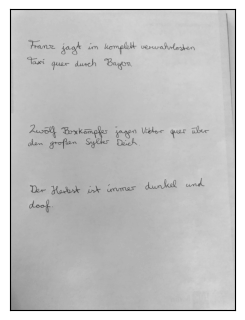

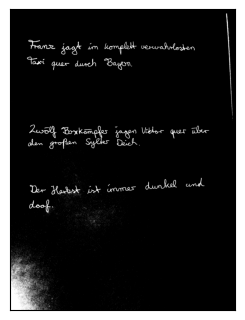

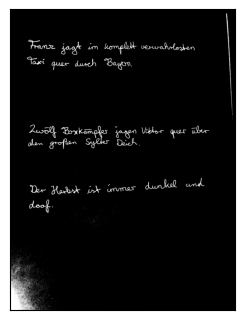

In [13]:
img = cv2.imread(BILD_BEIGE, cv2.IMREAD_GRAYSCALE)
img_filter = cv2.bilateralFilter(img, d=5, sigmaColor=1, sigmaSpace=50)
img_bin = binarize(img_filter)
show_img(img, cmap='gray')
show_img(binarize(img), cmap='gray')
show_img(img_bin, cmap='gray')

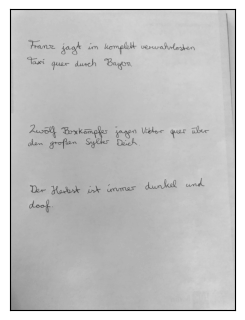

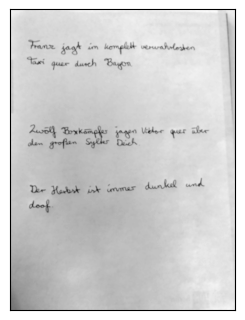

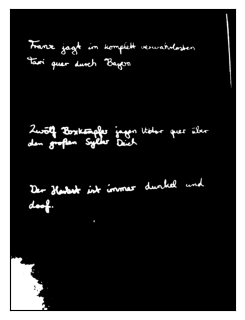

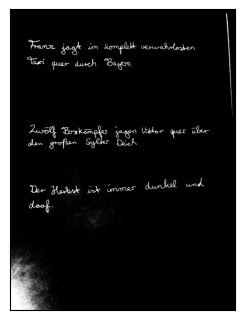

In [14]:
img = cv2.imread(BILD_BEIGE, cv2.IMREAD_GRAYSCALE)
img_denoised = cv2.fastNlMeansDenoising(img, h = 100)
show_img(img, cmap='gray')
show_img(img_denoised, cmap='gray')
show_img(binarize(img_denoised), cmap='gray')
show_img(cv2.fastNlMeansDenoising(binarize(img), h = 100), cmap='gray')

Image size: (4032, 3024)
1 Image size (4032, 3024), kernel size (20, 30)
2 Image size (4032, 3024), kernel size (50, 5)


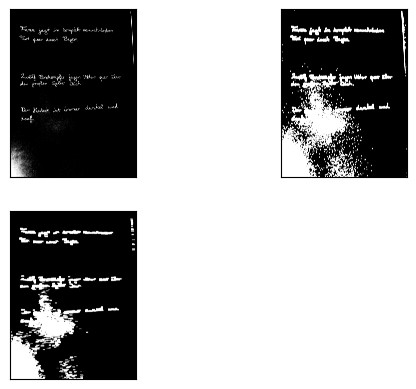

In [15]:
img = binarize(cv2.imread(BILD_BEIGE, cv2.IMREAD_GRAYSCALE))
x,y = img.shape       # assumes that IMG is grayscale (no third dimension)
print(f"Image size: {img.shape}")
# blur horizontally
img1 = morph(img, cv2.MORPH_DILATE, scale(img.shape, (0.005, 0.01)), 1)
# correct noise
img2 = morph(img1, cv2.MORPH_OPEN, (50,5), 4)
show_img([img, img1, img2], cmap='gray')


In [16]:

def smear(img: cv2.Mat) -> cv2.Mat:
    """Erode and dilate IMG."""
    x,y = img.shape       # assumes that IMG is grayscale (no third dimension)
    print(f"Image size: {img.shape}")
    # blur horizontally
    img1 = morph(img, cv2.MORPH_DILATE, (20,5), 1)
    # correct noise
    img2 = morph(img1, cv2.MORPH_OPEN, (50,5), 4)
    show_img([img, img1, img2], cmap='gray')
    return img2

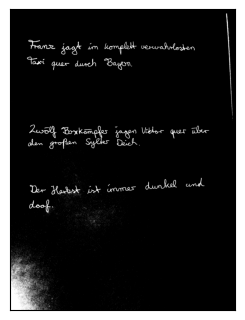

In [17]:
show_img(binarize(cv2.imread(BILD_BEIGE, cv2.IMREAD_GRAYSCALE)), cmap='gray')

In [ ]:
img = cv2.imread("/home/jv/Bilder/009_1.png")
img.shape

In [18]:
import cv2
import numpy as np

# load image
img = cv2.imread("/home/jv/Bilder/009_1.png")

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold the grayscale image
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# use morphology erode to blur horizontally
#kernel = np.ones((500,3), np.uint8)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (250, 3))
morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 17))
morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

# find contours
cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

# Draw contours
result = img.copy()
for c in cntrs:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)

#show_img([img, thresh, morph, ])


In [ ]:

# write result to disk
#cv2.imwrite("test_text_threshold.png", thresh)
#cv2.imwrite("test_text_morph.png", morph)
#cv2.imwrite("test_text_lines.jpg", result)

#cv2.imshow("GRAY", gray)
#cv2.imshow("THRESH", thresh)
#cv2.imshow("MORPH", morph)
#cv2.namedWindow("RESULT", cv2.WINDOW_KEEPRATIO)
#cv2.imshow("RESULT", result)
#cv2.resizeWindow("RESULT", 900, 300)
#cv2.waitKey(0)
#cv2.destroyAllWindows()



In [7]:
import cv2

for i in dir(cv2):
    if i.startswith('COLOR_') and 'BGR' in i:
        print(i)

COLOR_BAYER_BG2BGR
COLOR_BAYER_BG2BGRA
COLOR_BAYER_BG2BGR_EA
COLOR_BAYER_BG2BGR_VNG
COLOR_BAYER_BGGR2BGR
COLOR_BAYER_BGGR2BGRA
COLOR_BAYER_BGGR2BGR_EA
COLOR_BAYER_BGGR2BGR_VNG
COLOR_BAYER_GB2BGR
COLOR_BAYER_GB2BGRA
COLOR_BAYER_GB2BGR_EA
COLOR_BAYER_GB2BGR_VNG
COLOR_BAYER_GBRG2BGR
COLOR_BAYER_GBRG2BGRA
COLOR_BAYER_GBRG2BGR_EA
COLOR_BAYER_GBRG2BGR_VNG
COLOR_BAYER_GR2BGR
COLOR_BAYER_GR2BGRA
COLOR_BAYER_GR2BGR_EA
COLOR_BAYER_GR2BGR_VNG
COLOR_BAYER_GRBG2BGR
COLOR_BAYER_GRBG2BGRA
COLOR_BAYER_GRBG2BGR_EA
COLOR_BAYER_GRBG2BGR_VNG
COLOR_BAYER_RG2BGR
COLOR_BAYER_RG2BGRA
COLOR_BAYER_RG2BGR_EA
COLOR_BAYER_RG2BGR_VNG
COLOR_BAYER_RGGB2BGR
COLOR_BAYER_RGGB2BGRA
COLOR_BAYER_RGGB2BGR_EA
COLOR_BAYER_RGGB2BGR_VNG
COLOR_BGR2BGR555
COLOR_BGR2BGR565
COLOR_BGR2BGRA
COLOR_BGR2GRAY
COLOR_BGR2HLS
COLOR_BGR2HLS_FULL
COLOR_BGR2HSV
COLOR_BGR2HSV_FULL
COLOR_BGR2LAB
COLOR_BGR2LUV
COLOR_BGR2Lab
COLOR_BGR2Luv
COLOR_BGR2RGB
COLOR_BGR2RGBA
COLOR_BGR2XYZ
COLOR_BGR2YCR_CB
COLOR_BGR2YCrCb
COLOR_BGR2YUV
COLOR_BGR2YUV_I420
C

In [ ]:
img = cv2.imread("/home/jv/Bilder/009_1.png")

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
